### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Collection

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.shape

(20800, 5)

### Data Preprocessing

In [5]:
data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [6]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# dropping rows where title and author is null values as we are using only these two for training classifiers for prediction.
# And if they are empty, they are of no use for training.
# we are not using text column for training as it has so many words which increase number of features substantially.
# thus taking so much time for training classifiers.
data = data.dropna(subset = ['title','author'])

In [8]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
data.shape

(18285, 5)

In [10]:
data['content'] = data['author']+' '+ data['title']

In [11]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [12]:
# creating stopwords list using natural language toolkit to prevent them to be included in our features through stem func.

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\US593\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# stemming is the process of converting a word to its root word. This makes model training less computationally expensive.

In [17]:
portstem = PorterStemmer()

In [18]:
def stem(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # retrieving all the alphatebic words from content
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [portstem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
data['content'] = data['content'].apply(stem)

In [20]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


In [21]:
# spliting dataset into features and targets
X = data.content.values
y = data.label.values

In [22]:
X.shape

(18285,)

In [23]:
y.shape

(18285,)

In [24]:
# converting textual data into feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [25]:
X.shape

(18285, 15960)

In [26]:
y.shape

(18285,)

### Train_Test_Splits

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X, y , test_size = 0.1, stratify = y , shuffle = True, random_state = 3)

In [34]:
x_train.shape

(16456, 15960)

In [35]:
y_train.shape

(16456,)

In [36]:
x_test.shape

(1829, 15960)

In [37]:
y_test.shape

(1829,)

### Models Training with GridSearchCV

In [38]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def gridsearchcv(X, y):
    algos = {
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ['gini']
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [39]:
stats = gridsearchcv(x_train,y_train)

In [40]:
stats.to_csv('stats.csv')

In [41]:
stats

,model,best_score,best_params
0,random_forest,0.991920,{'criterion': 'gini'}
1,logistic_regression,0.987181,"{'penalty': 'l1', 'solver': 'liblinear'}"


### Models Evaluation

#### Random Forest Model Evaluation

In [42]:
with open('random_forest_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [43]:
model1.score(x_train,y_train)

1.0

In [44]:
model1.score(x_test,y_test)

0.9917987971569163

Text(58.222222222222214, 0.5, 'Truth')

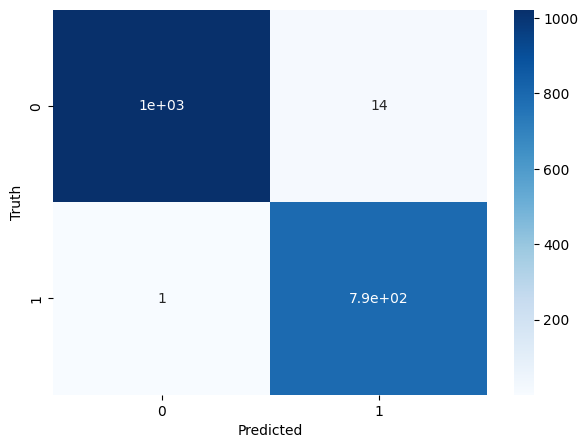

In [46]:
cm = confusion_matrix(y_test, model1.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Logistic Regression Model Evaluation

In [47]:
with open('logistic_regression_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [48]:
model2.score(x_train,y_train)

0.9918570734078755

In [49]:
model2.score(x_test,y_test)

0.9907053034445052

Text(58.222222222222214, 0.5, 'Truth')

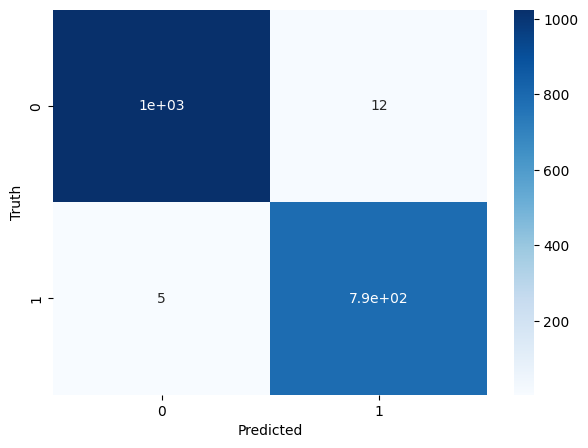

In [50]:
cm = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')